<a href="https://colab.research.google.com/github/ChenQin1155173025/STAT3011_2324_Group6/blob/main/3011_2_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I.Data Preprocessing:
Upload the file to colab and have an overview of the data

In [16]:
import pandas as pd
data=pd.read_csv('/content/ca.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
display(data.sample(6),'Dataframe Dimensions:',data.shape)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
418910,C572754,23055,IVORY CHANDELIER T-LIGHT HOLDER,-48,10/25/2011 17:29,1.00,15482,United Kingdom
93862,544316,72802C,VANILLA SCENT CANDLE JEWELLED BOX,6,2/17/2011 14:49,4.25,16556,United Kingdom
347489,567306,22179,SET 10 NIGHT OWL LIGHTS,24,9/19/2011 13:32,5.95,12752,Norway
461884,575954,22454,MEASURING TAPE BABUSHKA RED,8,11/13/2011 12:03,2.95,17211,United Kingdom
152108,549577,22536,MAGIC DRAWING SLATE PURDEY,24,4/11/2011 8:16,0.42,14286,United Kingdom
336733,566400,22551,PLASTERS IN TIN SPACEBOY,12,9/12/2011 13:16,1.65,17139,United Kingdom


'Dataframe Dimensions:'

(541909, 8)

See the type of each column and how many null values it contains

In [17]:
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'Column Data Type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'Null Values'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
                         rename(index={0:'Null Values (%)'}))
display(tab_info)

<ipython-input-17-50984896ef79>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-50984896ef79>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Data Type,object,object,object,int64,object,float64,object,object
Null Values,0,0,1454,0,0,0,135080,0
Null Values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


Check if the entries containing null values are successfully dropped

In [18]:
data.dropna(axis=0,inplace=True)
display(pd.DataFrame(data.isnull().sum()))

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


After dropping the duplicated values, the data has a shape of 401604×8

In [19]:
print('Duplicated Values:',data.duplicated().sum(),'\n')
data.drop_duplicates(inplace=True)
print(data.shape)

Duplicated Values: 5225 

(401604, 8)


Count the occurence of the countries and make a heat map

In [20]:
t1=data[['CustomerID','InvoiceDate','Country']].groupby(['CustomerID','InvoiceDate','Country']).count()
t1=t1.reset_index(drop=False)
t1

,CustomerID,InvoiceDate,Country
0,12346,1/18/2011 10:01,United Kingdom
1,12346,1/18/2011 10:17,United Kingdom
2,12347,1/26/2011 14:30,Iceland
3,12347,10/31/2011 12:25,Iceland
4,12347,12/7/2010 14:57,Iceland
...,...,...,...
22029,18283,7/14/2011 13:20,United Kingdom
22030,18283,9/5/2011 12:35,United Kingdom
22031,18287,10/12/2011 10:23,United Kingdom
22032,18287,10/28/2011 9:29,United Kingdom


In [21]:
countries=t1['Country'].value_counts()
print(countries,'\nNumber of countries: '+str(len(countries)))

United Kingdom          19708
Germany                   601
France                    458
EIRE                      318
Belgium                   119
Spain                     105
Netherlands               101
Portugal                   70
Switzerland                70
Australia                  66
Italy                      55
Finland                    48
Sweden                     45
Norway                     40
Channel Islands            33
Japan                      29
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Iceland                     7
Israel                      6
Canada                      6
Greece                      6
Czech Republic              5
European Community          5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Bahrain   

In [22]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
d1= dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Frequency'},
colorscale=[[0, 'rgb(255,255,255)'],
            [0.01, 'rgb(170,211,226)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(151,180,153)'], [0.20, 'rgb(253,220,0)'],
            [0.30,'rgb(255,250,0)'],
            [1, 'rgb(252,28,28)']],
reversescale = False)

layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [d1], layout = layout)
iplot(choromap, validate=False)

Add a column to indicate whether this order is canceled

In [23]:
t2=data.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
t2=t2.rename(columns={'InvoiceDate':'Number of Products'})
t2['Cancel or Not']=t2['InvoiceNo'].apply(lambda x:int('C' in x))
display(t2.sample(6))
print('{:.2f}% of the orders are canceled'.format(t2['Cancel or Not'].sum()*100/t2.shape[0]))

,CustomerID,InvoiceNo,Number of Products,Cancel or Not
210,12415,C545525,2,1
15197,16344,558894,2,0
2727,13001,547053,11,0
5289,13692,C551541,1,1
4590,13468,565937,8,0
9948,14883,573484,5,0


16.47% of the orders are canceled


In [24]:
dfc = data.copy(deep = True)
to_del=dfc[(dfc['Quantity']<0)&(dfc['StockCode']!='D')]
cleaned=dfc.drop(to_del.index)

In [25]:
cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [26]:
data.StockCode.value_counts()

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

In [27]:
Letter_stock_codes = [code for code in data.StockCode.unique() if str(code)[0].isdigit()==0]
#If a stock code starts with a letter, we list it as a special one
Letter_stock_codes
for code in Letter_stock_codes:
    print("{:<15} -> {:<30}".format(code, data[data['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


In [28]:
t2[t2['Cancel or Not']==1]#show the canceled orders

,CustomerID,InvoiceNo,Number of Products,Cancel or Not
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1
...,...,...,...,...
22159,18274,C577832,11,1
22161,18276,C577386,1,1
22162,18276,C577390,1,1
22164,18277,C542086,1,1


Define a noun extractor using the stopwords from NLTK

In [29]:
#extract the nouns of a description
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
def NounExtractor(text):
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        words = [word for word in words if word not in set(stopwords.words('english'))]
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag=='NN': # If the word is a noun
                return word
            else:
                return 'Null'



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Extract the nouns of the description since adjectives usually do not affect the category of a product

In [30]:
#use a countvectorizer to obtain the frequency of a noun
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(data['Description'].unique())
keywords = vectorizer.get_feature_names_out()

#
frequencies = x.toarray().sum(axis=0)

#
keywords_freq = dict(zip(keywords, frequencies))


In [31]:
#filter null values
selected_key=[]
for i in keywords:
    j=NounExtractor(i)
    if j !='Null':
        selected_key.append(j)

In [32]:
selected_dict = {key: value for key, value in keywords_freq.items() if key in selected_key}
sorted_keywords = sorted(selected_dict.items(), key=lambda x: x[1], reverse=True)

In [33]:
list_products = []
for k,v in selected_dict.items():
    word = k
    if word in ['pink', 'blue', 'tag', 'green', 'orange','set','colour','yellow']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse = True)

In [34]:
len(list_products)

202

We have around two hundred nouns in total and generate a horizontal bar graph

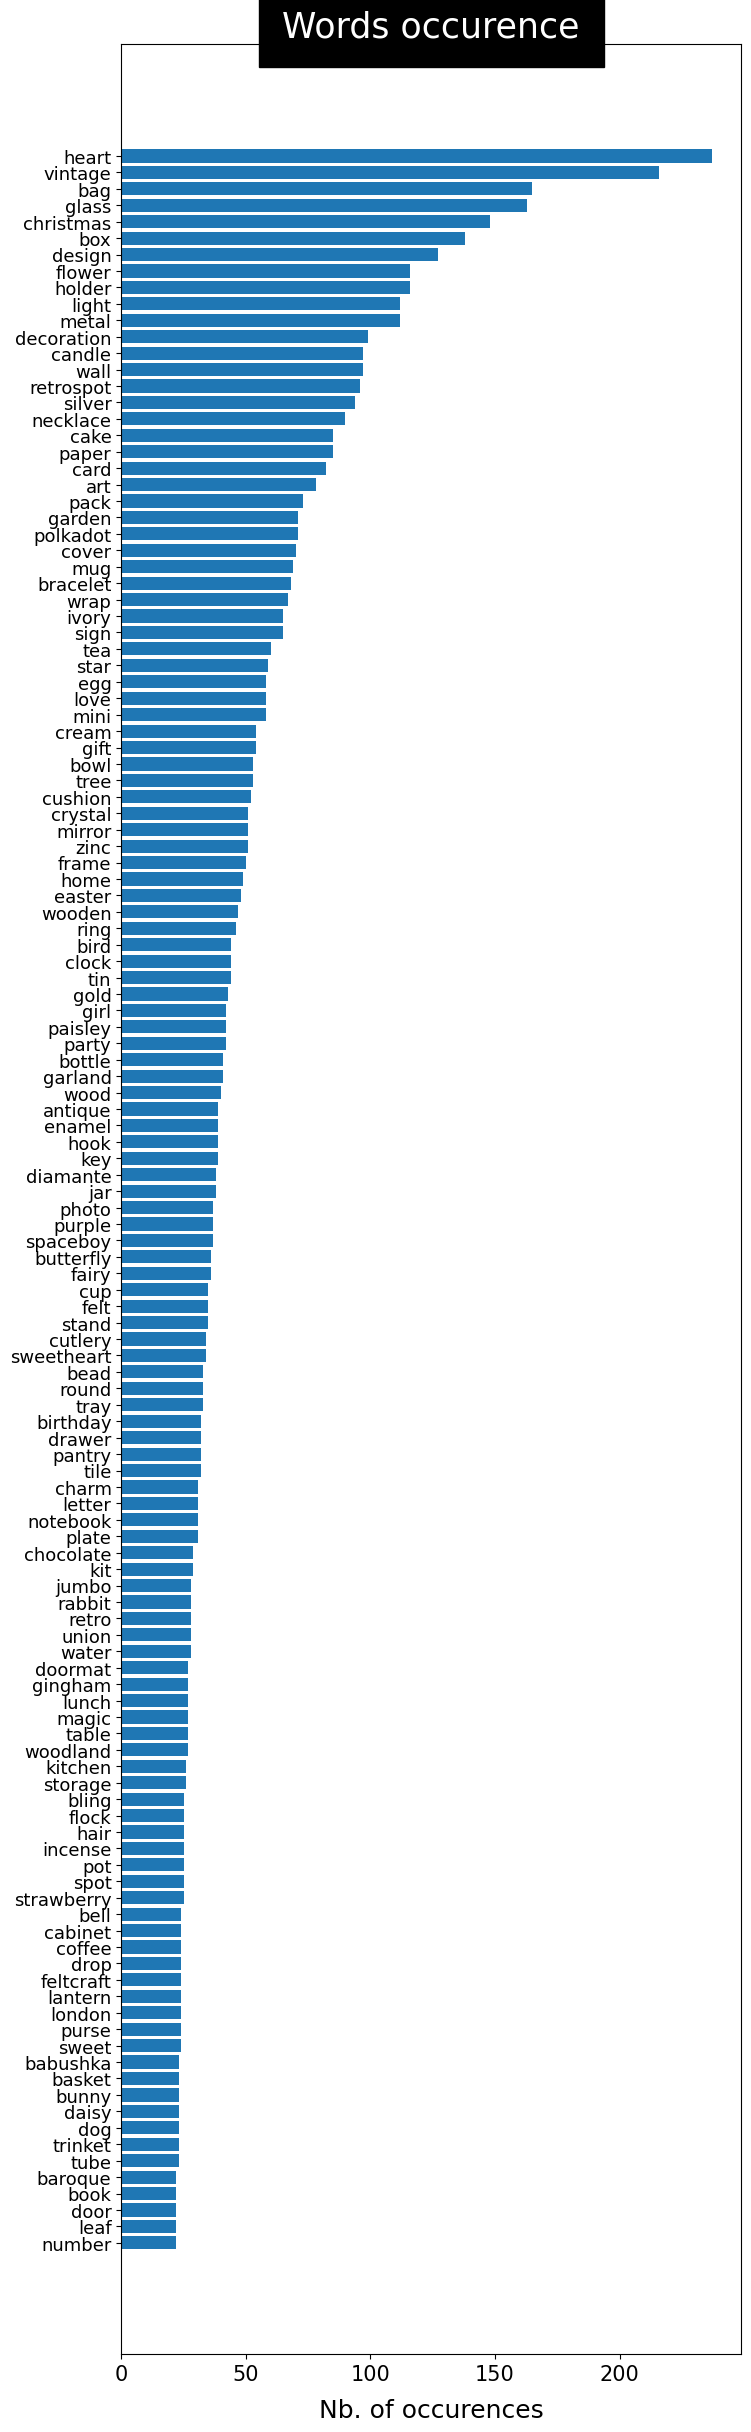

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 6
fig, ax = plt.subplots(figsize=(8, 30))
y_axis = [i[1] for i in list_products[:128]]
x_axis = [k for k,i in enumerate(list_products[:128])]
x_label = [i[0] for i in list_products[:128]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [36]:
#see if there are words that has litte relevancy to the product
#if some useless words were found, we could go back to the stopwords and add those words to the list
'''filtered_data1 = cleaned[cleaned['Description'].str.contains('daisy', case=False)]
print(filtered_data1.sample(10))

filtered_data2 = cleaned[cleaned['Description'].str.contains('felt', case=False)]
print(filtered_data2.sample(10))

filtered_data3 = cleaned[cleaned['Description'].str.contains('colour', case=False)]
print(filtered_data3.sample(10))

filtered_data4 = cleaned[cleaned['Description'].str.contains('bunny', case=False)]
print(filtered_data4.sample(10))


filtered_data5 = cleaned[cleaned['Description'].str.contains('bling', case=False)]
print(filtered_data5.sample(10))'''

"filtered_data1 = cleaned[cleaned['Description'].str.contains('daisy', case=False)]\nprint(filtered_data1.sample(10))\n\nfiltered_data2 = cleaned[cleaned['Description'].str.contains('felt', case=False)]\nprint(filtered_data2.sample(10))\n\nfiltered_data3 = cleaned[cleaned['Description'].str.contains('colour', case=False)]\nprint(filtered_data3.sample(10))\n\nfiltered_data4 = cleaned[cleaned['Description'].str.contains('bunny', case=False)]\nprint(filtered_data4.sample(10))\n\n\nfiltered_data5 = cleaned[cleaned['Description'].str.contains('bling', case=False)]\nprint(filtered_data5.sample(10))"

II.Clustering of products

In [37]:
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
class DbscanClustering():
    def __init__(self):
        self.stopwords = self.load_stopwords()
        self.vectorizer = CountVectorizer()
        self.transformer = TfidfTransformer()

    def load_stopwords(self):
        """
        load the stopwords and add some new words to the list
        """
        stopwords_list = stopwords.words('english')
        words_to_add = ['set', 'daisy', 'felt', 'bunny', 'bling', 'yellow','art', 'heart', 'pink', 'blue', 'tag','red','green','orange']
        stopwords_list.extend(words_to_add)
        return stopwords_list

    def preprocess_data(self, corpus):
        processed_corpus = []
        for text in corpus:
            # Tokenize the description
            tokens = word_tokenize(text)
            # Remove stopwords
            processed_text = ' '.join([word for word in tokens if word not in self.stopwords])
            processed_corpus.append(processed_text)
        return processed_corpus

    def get_text_tfidf_matrix(self, corpus):
        tfidf = self.transformer.fit_transform(self.vectorizer.fit_transform(corpus))
        # get the weights in the tfidf matrix
        weights = tfidf.toarray()
        return weights

    def pca(self, weights, n_components=2):
        """
        PCA reduces the dimensionality
        :param n_components:
        """
        pca = PCA(n_components=n_components)
        return pca.fit_transform(weights)

    def dbscan(self, corpus, eps=1, min_samples=3, fig=True):
        """
        DBSCAN：Density Based Clustering of Applications with Noise
        :param eps: The radius of the circle
        :param min_samples: minimum number of samples inside a circle
        """
        processed_corpus = self.preprocess_data(corpus)
        weights = self.get_text_tfidf_matrix(processed_corpus)
        pca_weights=self.pca(weights)
        clf = DBSCAN(eps=eps, min_samples=min_samples)
        y = clf.fit_predict(pca_weights)
        if fig:
            figure(figsize=(8, 6), dpi=80)
            plt.scatter(pca_weights[:, 0], pca_weights[:, 1], c=y)
            plt.show()
        labels= clf.labels_
        # The indice in cluster
        result = {}

        for text_idx, label_idx in enumerate(y):
            if label_idx not in result:
                result[label_idx] = [text_idx]
            else:
                result[label_idx].append(text_idx)
        return result






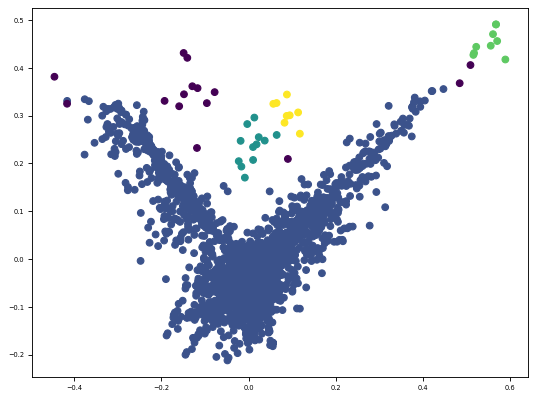

{2: [0, 167, 502, 1039, 1567, 1911, 3138, 3741, 3876], 0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

In [38]:
#DBSCAN using TFIDF does not cluster the descriptions appropriately
lp=cleaned['Description'].unique()
corpus=list(lp)
dbs=DbscanClustering()
clustering=dbs.dbscan(corpus,eps=0.05,min_samples=8)
print(clustering)

Import the GloVe Embedding Model

In [40]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip
#install glove

--2024-03-25 12:07:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-25 12:07:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-25 12:07:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [41]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1

    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

embedding_dim = 50 #try 50,100,200
embedding_matrix_vocab = embedding_for_vocab(
    '/content/glove.6B.50d.txt', tokenizer.word_index,
  embedding_dim)
#the file path should be changed when the dimension is changed
print("Dense vector for first word is => ",
      embedding_matrix_vocab[1])

Dense vector for first word is =>  [-0.087659    0.11144     0.1543      0.30509999  0.40663001 -0.017369
 -0.15209    -0.13592    -0.14259    -0.050335   -0.32163    -0.32965001
 -0.77749997  0.54233998  0.71429002  0.0045754   0.42765999 -0.74396002
 -0.37613001 -0.63296002  0.51587999 -0.078446   -0.26620001 -0.164
 -0.015405   -1.12460005  0.15968999 -0.3793      0.069653   -0.25448999
  3.62010002 -0.05886    -0.6494      0.10255     0.058746    0.1753
  0.63647002  0.46641999 -0.34624001 -0.31667     0.011133   -0.032083
  0.34643999 -0.15786    -0.19963001  0.50825     0.41812    -0.38405001
 -0.081924   -0.50999999]


In [116]:
sequences =tokenizer.texts_to_sequences(corpus)
sequences

[[11, 22, 4, 19, 17, 14],
 [11, 18, 145],
 [61, 797, 111, 410, 199],
 [411, 121, 307, 112, 122, 81],
 [7, 1300, 1301, 11, 4],
 [1, 412, 155, 798, 191],
 [9, 51, 973, 19, 17, 14],
 [182, 192, 121, 173],
 [182, 192, 7, 799, 974],
 [53, 96, 73, 1302],
 [677, 678, 1303],
 [677, 678, 135],
 [146, 800, 308, 309],
 [49, 411, 45, 216],
 [12, 3, 35, 53, 96, 1304],
 [12, 3, 6, 226, 975],
 [12, 3, 6, 227, 975],
 [66, 801, 451, 802],
 [54, 801, 451, 802],
 [498, 12, 37, 18, 4],
 [127, 206, 679],
 [200, 803, 1, 37, 804],
 [7, 410, 244, 499, 805],
 [147, 410, 244, 499, 805],
 [5, 410, 244, 499, 805],
 [500, 801, 451, 802],
 [452, 74, 501, 2],
 [452, 74, 501, 7],
 [452, 74, 501, 24],
 [1305, 38, 502, 283, 413],
 [263, 57, 201],
 [976, 1306, 1307],
 [6, 977, 38, 978, 36, 584],
 [1, 67, 7, 29, 52, 453],
 [113, 364, 191, 1, 1308, 128],
 [93, 129, 12],
 [129, 12, 174, 54, 148],
 [284, 285, 129, 12],
 [308, 8, 83, 77, 13],
 [7, 341, 585, 586, 17],
 [1, 67, 52, 453, 174, 54, 148],
 [6, 680, 226, 1309],
 [5

Let each entry of the feature matrix be the sum of embedded values of the words in this description

In [43]:
#calculate the sum of embedding values for a description
feature_matrix=[]
for i in sequences:
  vi=np.zeros(50)
  for j in i:
    vj=embedding_matrix_vocab[j]
    vi+=vj
  feature_matrix.append(vi)

feature_matrix=np.array(feature_matrix)
print(feature_matrix.shape)

(3878, 50)


Cluster the products with K-means(K=4)

For n_clusters = 3 The average silhouette_score is : 0.34035756904255876
Calinski-Harabasz score: 2936.108342843826
For n_clusters = 4 The average silhouette_score is : 0.35257669177824025
Calinski-Harabasz score: 3071.484804078157
For n_clusters = 5 The average silhouette_score is : 0.31407611877772046
Calinski-Harabasz score: 2827.554319333831
For n_clusters = 6 The average silhouette_score is : 0.32668719373515087
Calinski-Harabasz score: 2962.8017662215516
For n_clusters = 7 The average silhouette_score is : 0.32705128713028975
Calinski-Harabasz score: 2910.415291557894
For n_clusters = 8 The average silhouette_score is : 0.32858123640994574
Calinski-Harabasz score: 2895.9790868905084
For n_clusters = 9 The average silhouette_score is : 0.32264205774313104
Calinski-Harabasz score: 2826.08207434418


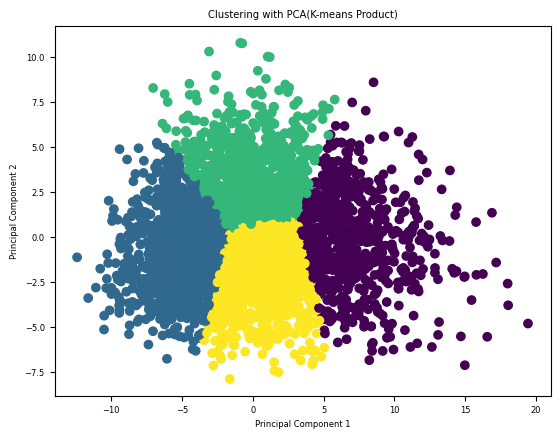

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
Pca=PCA(2)
reduced_vectors=Pca.fit_transform(feature_matrix)
best_n_clusters = None
best_silhouette_avg = -1
for n_clusters in range(3,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(reduced_vectors)
    clusters = kmeans.predict(reduced_vectors)
    silhouette_avg = silhouette_score(reduced_vectors, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    score = calinski_harabasz_score(reduced_vectors, kmeans.labels_)
    print("Calinski-Harabasz score:", score)
    if silhouette_avg > best_silhouette_avg:
        best_silhouette_avg = silhouette_avg
        best_n_clusters = n_clusters
kmeans=KMeans(n_clusters=best_n_clusters,random_state=42,n_init="auto").fit(reduced_vectors)
clusters=kmeans.predict(reduced_vectors)
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters,cmap='viridis')
plt.title('Clustering with PCA(K-means Product)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


DBSCAN still does not cluster the products well even with embedding model

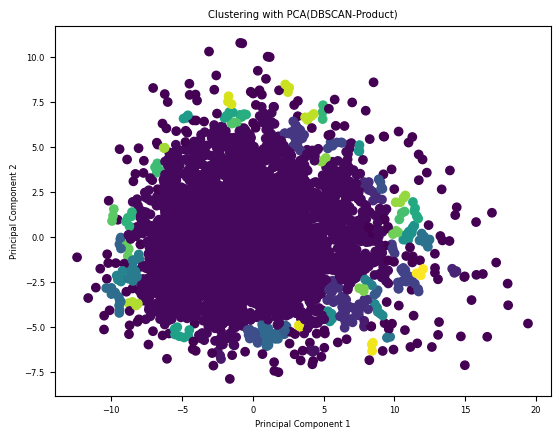

Estimated no. of noise points: 188
No. of clusters:  51


In [45]:
#show the result of dbscan
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
pca_glove=PCA(2)
reduced_vectors=pca_glove.fit_transform(feature_matrix)
dbsc=DBSCAN(eps=0.4, min_samples=3)#tune the parameter to obtain a proper clustering
clusterdbs=dbsc.fit_predict(reduced_vectors)


plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusterdbs, cmap='viridis')
plt.title('Clustering with PCA(DBSCAN-Product)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

n_noise = list(dbsc.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)
print('No. of clusters: ',np.max(dbsc.labels_)+1)
#The points are too concentrated

III.Customer Segmentation

In [46]:
cleaned['TotalPrice']=cleaned['Quantity']*cleaned['UnitPrice']
cleaned


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [47]:
#Initialize the amount of money spent on each category
for i in [1,2,3,4]:
  cleaned[f'Category{i}']=100

In [48]:
cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Category1,Category2,Category3,Category4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,100,100,100,100
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,100,100,100,100
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,100,100,100,100
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,100,100,100,100
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20,100,100,100,100
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60,100,100,100,100
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60,100,100,100,100
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60,100,100,100,100


In [49]:
lp[np.where(clusters==0)]#see the descriptions in cluster0

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'KNITTED UNION FLAG HOT WATER BOTTLE',
       'GLASS STAR FROSTED T-LIGHT HOLDER',
       'BOX OF 6 ASSORTED COLOUR TEASPOONS',
       'RECIPE BOX WITH METAL HEART', 'JAM MAKING SET WITH JARS',
       'VINTAGE HEADS AND TAILS CARD GAME ',
       'SET/2 RED RETROSPOT TEA TOWELS ',
       'ROUND SNACK BOXES SET OF4 WOODLAND ', 'LUNCH BOX I LOVE LONDON',
       ' SET 2 TEA TOWELS I LOVE LONDON ',
       'WOOD 2 DRAWER CABINET WHITE FINISH',
       'WOOD S/3 CABINET ANT WHITE FINISH',
       'WOODEN PICTURE FRAME WHITE FINISH',
       'HOT WATER BOTTLE TEA AND SYMPATHY',
       'RED HANGING HEART T-LIGHT HOLDER',
       'RED 3 PIECE RETROSPOT CUTLERY SET',
       'BLUE 3 PIECE POLKADOT CUTLERY SET',
       'SET/6 RED SPOTTY PAPER PLATES', 'PACK OF 72 RETROSPOT CAKE CASES',
       'PACK OF 60 DINOSAUR CAKE CASES',
       'PACK OF 60 PINK PAISLEY CAKE CASES',
       'RETROSPOT TEA SET CERAMIC 11 PC ', 'COOK WITH WINE METAL SIGN ',
       'Y

Multiply the total amount with the indicator of each category

In [50]:
#We use the clustering results of K-means
for index, row in cleaned.iterrows():
    description = row['Description']
    c1 = 1 if description in lp[np.where(clusters==0)] else 0
    c2 = 1 if description in lp[np.where(clusters==1)] else 0
    c3 = 1 if description in lp[np.where(clusters==2)] else 0
    c4 = 1 if description in lp[np.where(clusters==3)] else 0
    # Update the cluster indicator columns
    cleaned.at[index, 'Category1'] = c1*cleaned.at[index,'TotalPrice']
    cleaned.at[index, 'Category2'] = c2*cleaned.at[index,'TotalPrice']
    cleaned.at[index, 'Category3'] = c3*cleaned.at[index,'TotalPrice']
    cleaned.at[index, 'Category4'] = c4*cleaned.at[index,'TotalPrice']
#1/0 implies which category this product is in



Extract the train data: orders placed before 1 October 2011

In [51]:
import datetime
temp=cleaned[pd.to_datetime(cleaned['InvoiceDate'])<=pd.Timestamp(2011,10,1)].groupby(['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
temp

,CustomerID,InvoiceNo,TotalPrice
0,12346,541431,77183.60
1,12347,537626,711.79
2,12347,542237,475.39
3,12347,549222,636.25
4,12347,556201,382.52
...,...,...,...
13221,18283,557956,192.80
13222,18283,560025,137.39
13223,18283,560032,2.50
13224,18283,565579,134.90


Set the test data

In [52]:
set_test=cleaned[pd.to_datetime(cleaned['InvoiceDate'])>pd.Timestamp(2011,10,1)].groupby(['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
set_test

,CustomerID,InvoiceNo,TotalPrice
0,12347,573511,1294.32
1,12347,581180,224.82
2,12349,577609,1757.55
3,12352,574275,311.73
4,12356,576895,58.35
...,...,...,...
5370,18283,578262,307.05
5371,18283,579673,220.31
5372,18283,580872,208.00
5373,18287,570715,1001.32


In [53]:
temp2=cleaned[pd.to_datetime(cleaned['InvoiceDate'])<=pd.Timestamp(2011,10,1)]
temp2.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Category1,Category2,Category3,Category4
18274,537817,22837,HOT WATER BOTTLE BABUSHKA,4,12/8/2010 13:53,4.65,18269,United Kingdom,18.60,0.0,0.00,18.6,0.0
173300,551687,21495,SKULLS AND CROSSBONES WRAP,25,5/3/2011 13:22,0.42,14135,United Kingdom,10.50,0.0,10.50,0.0,0.0
22467,538171,21591,COSY HOUR CIGAR BOX MATCHES,4,12/9/2010 20:01,1.25,17530,United Kingdom,5.00,0.0,0.00,0.0,5.0
56823,541115,85178,VICTORIAN SEWING KIT,12,1/13/2011 15:34,1.25,12578,Italy,15.00,0.0,15.00,0.0,0.0
271409,560692,23302,KNEELING MAT HOUSEWORK DESIGN,1,7/20/2011 12:01,1.65,14704,United Kingdom,1.65,0.0,1.65,0.0,0.0


In [54]:
for i in temp2.columns[9:13]:
    a=temp2.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[i].sum()[i]
    temp[i]=a
temp.sample(3)

,CustomerID,InvoiceNo,TotalPrice,Category1,Category2,Category3,Category4
11190,17416,545530,2114.71,96.36,944.50,513.65,560.20
160,12428,549588,373.72,80.58,197.46,45.64,50.04
651,12653,559948,1430.75,45.00,529.62,193.53,662.60


Replace the real amount spent on each category with a percentage so that the variances will be smaller

In [55]:
transactions_per_user=temp.groupby(by=['CustomerID'])['TotalPrice'].agg(['count','min','max','mean','sum'])
for i in temp.columns[3:7]:
    col = i
    transactions_per_user.loc[:,col] = temp.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)

In [56]:
transactions_per_user=transactions_per_user.dropna(axis=0)

In [57]:
transactions_per_user

,CustomerID,count,min,max,mean,sum,Category1,Category2,Category3,Category4
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000
1,12347,5,382.52,711.79,558.172000,2790.86,18.313351,20.027518,18.496091,43.163039
2,12348,4,227.44,892.80,449.310000,1797.24,36.226659,37.346153,18.361488,8.065701
3,12350,1,334.40,334.40,334.400000,334.40,7.535885,47.338517,11.393541,33.732057
4,12352,7,120.33,840.30,313.472857,2194.31,9.684138,58.615237,12.845040,18.855586
...,...,...,...,...,...,...,...,...,...,...
3611,18280,1,180.60,180.60,180.600000,180.60,22.923588,27.796235,0.000000,49.280177
3612,18281,1,80.82,80.82,80.820000,80.82,0.000000,25.167038,0.000000,74.832962
3613,18282,1,100.21,100.21,100.210000,100.21,6.626085,30.386189,49.096897,13.890829
3614,18283,10,2.50,192.80,108.683000,1086.83,17.640293,43.769495,9.809262,28.780950


Around 40% of the orders are single purchase

In [58]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("no. of single purchase clients: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

no. of single purchase clients: 1445/3616  (39.96%)


Get the X (all entries included)

In [59]:
xall=cleaned.groupby(['CustomerID','InvoiceNo'],as_index=False)['TotalPrice'].sum()
for i in cleaned.columns[9:13]:
    a=cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[i].sum()[i]
    xall[i]=a
xall.sample(3)


,CustomerID,InvoiceNo,TotalPrice,Category1,Category2,Category3,Category4
8351,14911,549667,744.41,175.20,261.05,99.91,208.25
585,12540,551868,1380.11,158.82,511.14,0.00,710.15
18113,18109,569965,397.63,179.05,167.55,0.00,51.03


In [60]:
transactions_per_user_all=xall.groupby(by=['CustomerID'])['TotalPrice'].agg(['count','min','max','mean','sum'])
for i in xall.columns[3:7]:
    col = i
    transactions_per_user_all.loc[:,col] = xall.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user_all['sum']*100

transactions_per_user_all.reset_index(drop = False, inplace = True)
transactions_per_user_all=transactions_per_user_all.dropna(axis=0)
transactions_per_user_all

,CustomerID,count,min,max,mean,sum,Category1,Category2,Category3,Category4
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000
1,12347,7,224.82,1294.32,615.714286,4310.00,15.322506,22.373550,14.414849,47.889095
2,12348,4,227.44,892.80,449.310000,1797.24,36.226659,37.346153,18.361488,8.065701
3,12349,1,1757.55,1757.55,1757.550000,1757.55,25.678928,48.853802,9.050667,16.416603
4,12350,1,334.40,334.40,334.400000,334.40,7.535885,47.338517,11.393541,33.732057
...,...,...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,180.60,180.600000,180.60,22.923588,27.796235,0.000000,49.280177
4335,18281,1,80.82,80.82,80.820000,80.82,0.000000,25.167038,0.000000,74.832962
4336,18282,2,77.84,100.21,89.025000,178.05,3.729290,34.344285,27.632687,34.293738
4337,18283,16,1.95,307.05,127.845625,2045.53,17.626239,42.684292,10.320553,29.368917


In [61]:
list_cols = transactions_per_user_all.columns[1:10]
selected_customers = transactions_per_user_all.copy(deep = True)
matrix_to_be =pd.DataFrame(selected_customers[list_cols])

In [62]:
matrix_to_be.sample(6)

,count,min,max,mean,sum,Category1,Category2,Category3,Category4
4018,2,44.35,69.99,57.170,114.34,25.100577,20.893825,41.630226,12.375372
727,2,108.46,490.11,299.285,598.57,19.623436,18.716274,19.045392,42.614899
845,5,15.00,665.28,360.912,1804.56,12.163076,50.243827,15.803298,21.789799
3958,3,21.95,652.81,273.320,819.96,19.396068,33.332114,20.925411,26.346407
4162,1,178.34,178.34,178.340,178.34,22.944937,49.360772,6.807222,20.887070
2254,4,839.99,1375.24,996.080,3984.32,22.980333,26.261696,13.255712,37.502259


In [63]:
matrix_to_be=matrix_to_be.dropna()
matrix_to_be.shape

(4338, 9)

Standardize the X and fit it to a PCA object

In [64]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(matrix_to_be)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix_to_be)

variables mean values: 
------------------------------------------------------------------------------------------
 [   4.28769018  260.53876026  653.64825081  417.14051322 2047.37498248
   23.96425796   29.69076579   15.05504001   31.28993624]


In [65]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

Visualize how much variance each principal component contributes

>



<ipython-input-66-1652af7782ab>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



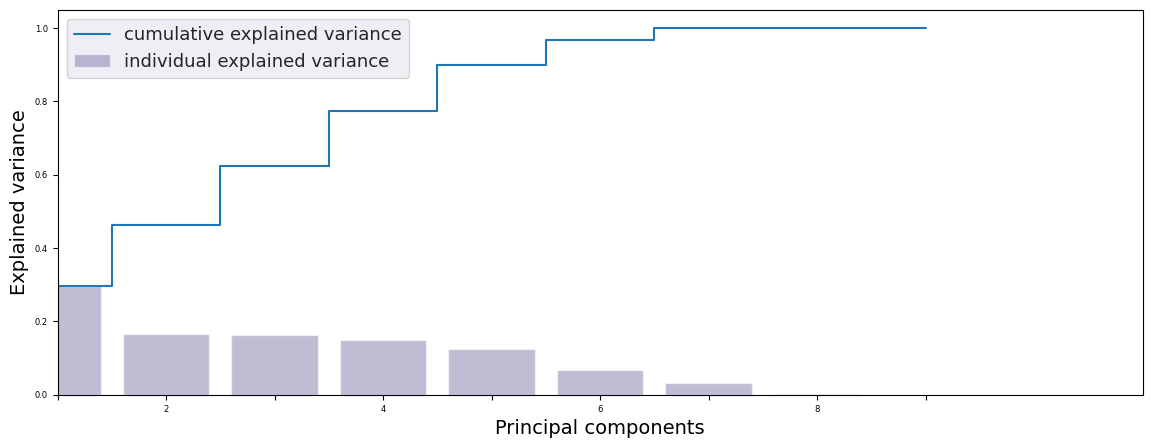

In [66]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix_to_be.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',label='cumulative explained variance')
sns.barplot(x=np.arange(1, matrix_to_be.shape[1] + 1), y=pca.explained_variance_ratio_, alpha=0.5, color='m',label='individual explained variance')
plt.xlim(0, 10)
ax = plt.gca()
ax.set_xticklabels([s if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])
plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);
plt.show()

Use the silhouette score to select the best number of clusters for k-means

In [67]:
#Customer Clustering:Kmeans
for no_clusters in np.arange(3,12):
    kmeans = KMeans(init='k-means++', n_clusters = no_clusters, n_init=100)
    kmeans.fit(scaled_matrix)
    clusters_clients = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
    print(f'no. of clusters: {no_clusters}',f'silhouette: {silhouette_avg}')
    print(pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['no. of clients']).T,'\n')


no. of clusters: 3 silhouette: 0.8073411936897616
                   0   2  1
no. of clients  4310  26  2 

no. of clusters: 4 silhouette: 0.20323964097848204
                   1     2   0  3
no. of clients  2689  1620  27  2 

no. of clusters: 5 silhouette: 0.203223984866365
                   1     4     0   3  2
no. of clients  2020  1259  1031  26  2 

no. of clusters: 6 silhouette: 0.20514123397873424
                   1     0    5   4  2  3
no. of clients  2085  1229  996  26  1  1 

no. of clusters: 7 silhouette: 0.2403891212896464
                   1    6    0    3   2  4  5
no. of clients  2297  996  703  314  26  1  1 

no. of clusters: 8 silhouette: 0.2530214305822059
                   0    7    5    6    4   1  2  3
no. of clients  2399  619  554  460  278  26  1  1 

no. of clusters: 9 silhouette: 0.2585378643828455
                   5    1    3    0    8   6  7  2  4
no. of clients  2391  620  553  441  269  56  6  1  1 

no. of clusters: 10 silhouette: 0.26520392383

In [68]:
#K=3 Points are too concentrated
#K=10 has the best performance
kmeans = KMeans(init='k-means++', n_clusters = 10, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
pca = PCA()
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)


In [69]:
mat['cluster']

0       4
1       2
2       7
3       0
4       0
       ..
4333    2
4334    2
4335    7
4336    7
4337    1
Name: cluster, Length: 4338, dtype: int32

DBSCAN does not cluster the customers well either

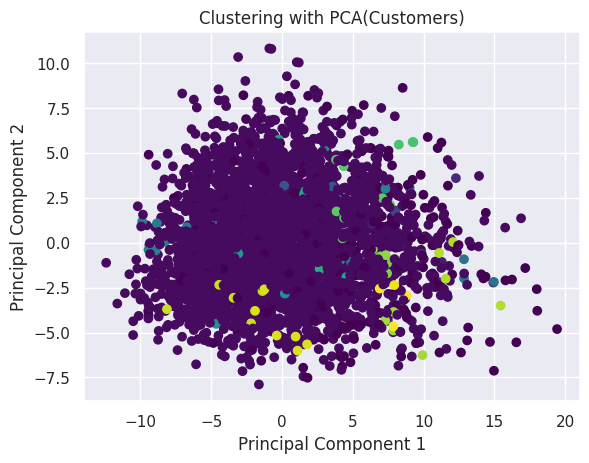

Estimated no. of noise points: 343
No. of clusters:  35


In [70]:
#Customer Clustering using DBSCAN
#Too many noise points and clusters
pca_c=PCA(2)
reduced_c=pca_c.fit_transform(feature_matrix)
dbscanc=DBSCAN(eps=8,min_samples=3)
customer_cluster=dbscanc.fit_predict(feature_matrix)
plt.scatter(reduced_c[:, 0], reduced_c[:, 1], c=customer_cluster, cmap='viridis')
plt.title('Clustering with PCA(Customers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

n_noise = list(dbscanc.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)
print('No. of clusters: ',np.max(dbscanc.labels_)+1)

Visualize the relations between principal components.
Well-separated clusters with clear boundaries can be observed.

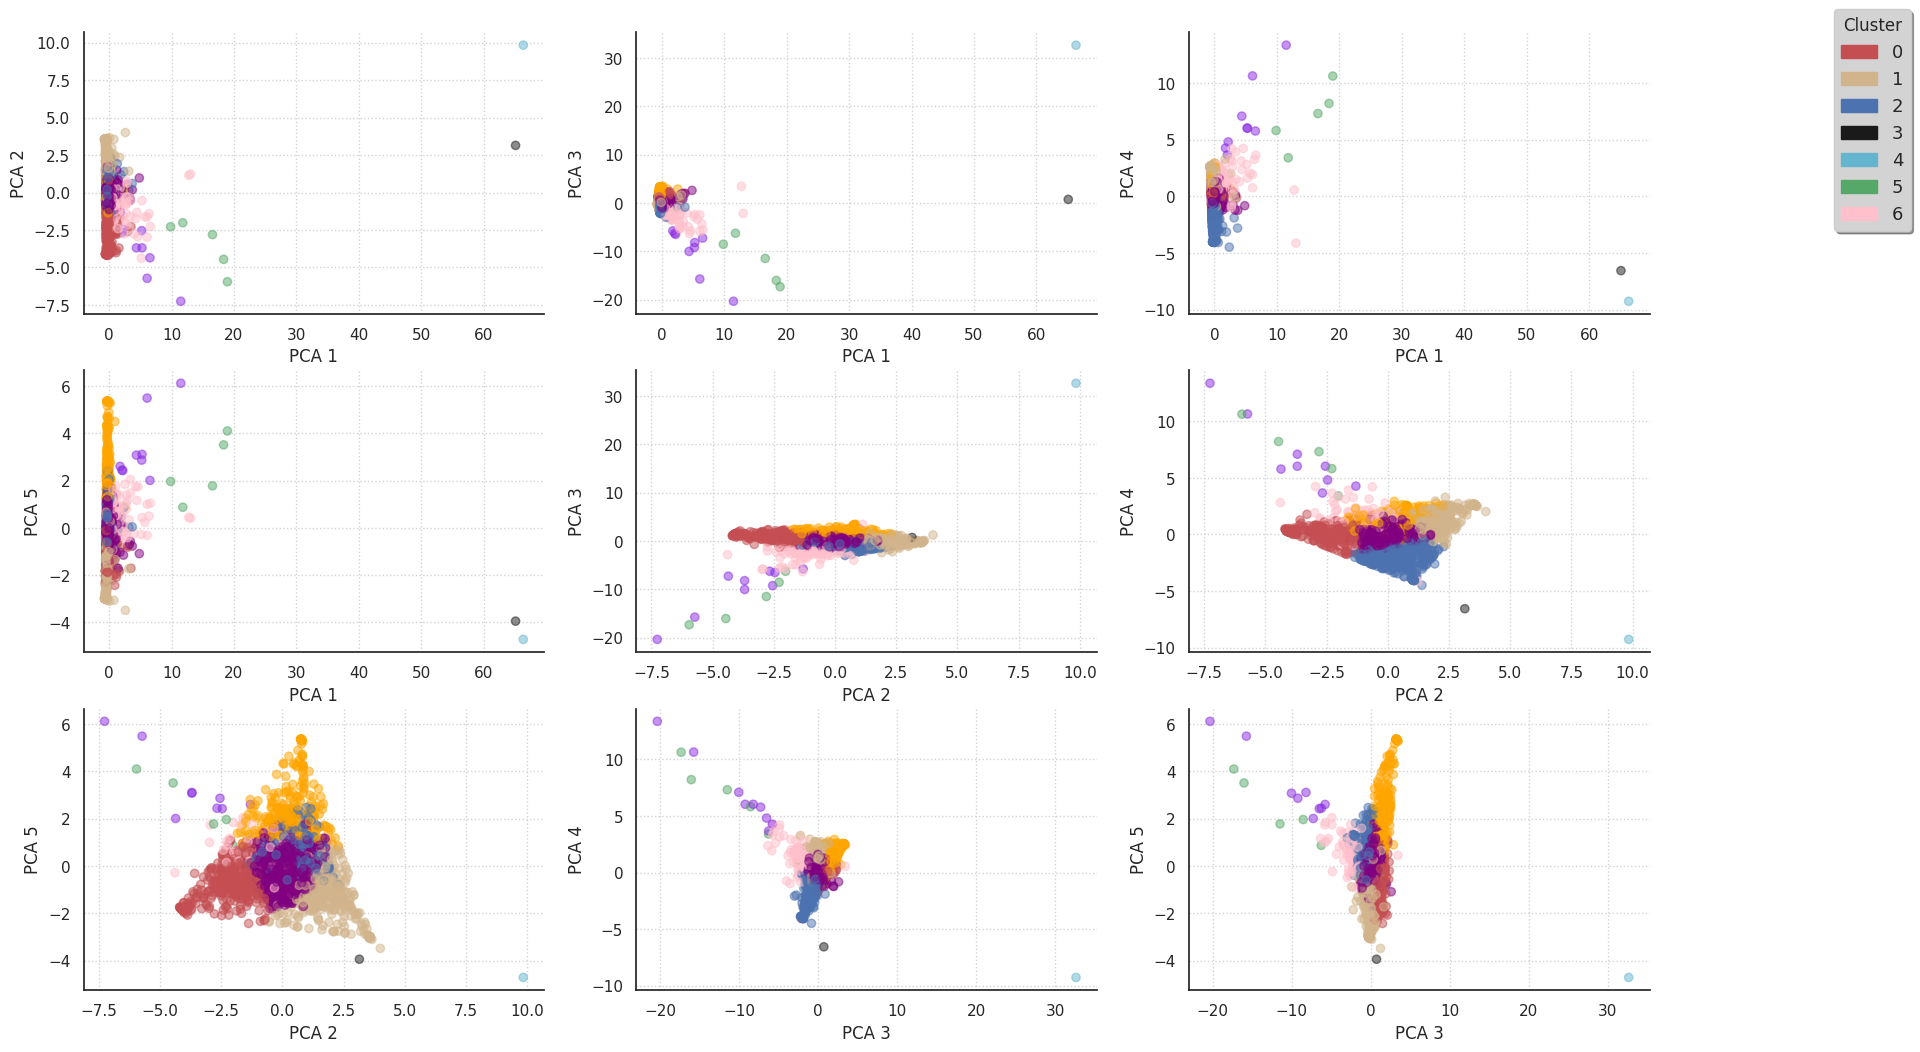

In [108]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0: 'r', 1: 'tan', 2: 'b', 3: 'k', 4: 'c', 5: 'g', 6: 'pink', 7: 'purple', 8: 'orange', 9: 'blueviolet'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (18,16))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 5):
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5)
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        if increment == 9: break
    if increment == 9: break

#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(7):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9),
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)



In [72]:
import matplotlib as mpl
import matplotlib.cm as cm
mpl.rc('patch', edgecolor = 'dimgray', linewidth=0.5)
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.15 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

Another approach to check the quality of separation is to visualize the silhouette score in each cluster. Points in cluster 7 are most cohesive.

<ipython-input-72-da18e1d075dd>:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



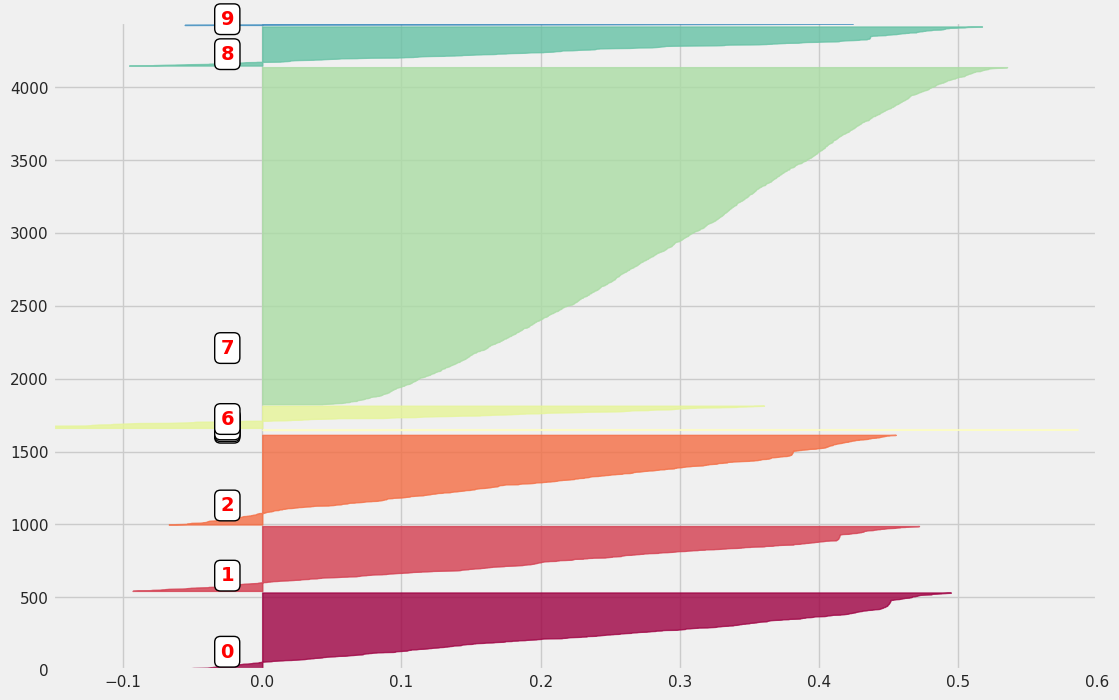

In [110]:
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(10, [-0.15, 0.6], len(scaled_matrix), sample_silhouette_values, clusters_clients)

Append Y(the cluster column) to X(the first to the second last column)

In [74]:
df=pd.DataFrame(selected_customers)
df.loc[:, 'cluster'] = clusters_clients

In [112]:
df.sample(8)

,CustomerID,count,min,max,mean,sum,Category1,Category2,Category3,Category4,cluster
3546,17191,7,30.45,532.17,299.097143,2093.68,22.913244,22.194891,26.272878,28.618987,7
3283,16817,9,6.80,244.20,178.305556,1604.75,24.955289,14.305032,16.403178,44.336501,7
4282,18212,1,216.07,216.07,216.070000,216.07,26.213727,10.760402,8.275096,54.750775,2
3617,17298,2,107.64,390.78,249.210000,498.42,10.142049,35.010634,39.432607,15.414710,8
4146,18019,1,38.45,38.45,38.450000,38.45,0.000000,25.747724,12.873862,61.378414,2
1201,13975,6,151.76,722.07,410.206667,2461.24,27.368725,34.960833,9.863727,27.806715,7
343,12772,1,892.47,892.47,892.470000,892.47,22.219234,38.732955,14.504689,24.543122,7
118,12493,2,201.24,232.50,216.870000,433.74,0.000000,41.649375,19.119749,39.230876,7


Get the mean value of each column grouped by cluster

In [118]:
merged_df = pd.DataFrame()
for i in range(10):
    test = pd.DataFrame(df[df['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = df[df['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')
merged_df.columns

number of customers: 4338


Index(['count', 'min', 'max', 'mean', 'sum', 'Category1', 'Category2',
       'Category3', 'Category4', 'size'],
      dtype='object')

In [119]:
merged_df

,count,min,max,mean,sum,Category1,Category2,Category3,Category4,size
cluster,,,,,,,,,,
8.0,2.178439,196.263680,294.833011,242.540758,550.661264,13.186056,17.906321,53.859473,15.048149,269
2.0,2.534091,244.054222,417.503687,319.363077,803.338330,14.672778,17.807789,7.936734,59.582698,616
1.0,2.744395,226.451256,390.501076,301.290505,855.661883,58.347622,13.815431,10.613647,17.223300,446
0.0,2.809160,271.899008,494.542939,370.258891,1101.293931,9.223556,64.156019,9.406684,17.213741,524
7.0,3.811582,255.001219,559.682736,391.602159,1432.490987,24.460881,29.311822,14.731291,31.496007,2314
6.0,23.666667,111.179935,2529.214902,832.305587,15002.024379,23.366547,32.529950,12.215340,31.888162,153
9.0,117.222222,-60.295556,2696.457778,443.186525,49776.407778,21.654246,32.840235,18.109175,27.396344,9
4.0,1.000000,77183.600000,77183.600000,77183.600000,77183.600000,0.000000,0.000000,100.000000,0.000000,1
3.0,2.000000,2.900000,168469.600000,84236.250000,168472.500000,0.000000,0.001721,0.000000,99.998279,1


In [120]:
liste_index = []
for i in [1,2,3,4]:
    column = f'Category{i}'
    if merged_df[merged_df[column] > 45].index.values.size > 0:
        liste_index.append(merged_df[merged_df[column] > 45].index.values[0])

liste_index_reordered = liste_index
#___________________________________
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum',
                   'Category1', 'Category2', 'Category3','Category4', 'size']])

,cluster,count,min,max,mean,sum,Category1,Category2,Category3,Category4,size
0,1.0,2.744395,226.451256,390.501076,301.290505,855.661883,58.347622,13.815431,10.613647,17.223300,446
1,0.0,2.809160,271.899008,494.542939,370.258891,1101.293931,9.223556,64.156019,9.406684,17.213741,524
2,8.0,2.178439,196.263680,294.833011,242.540758,550.661264,13.186056,17.906321,53.859473,15.048149,269
3,2.0,2.534091,244.054222,417.503687,319.363077,803.338330,14.672778,17.807789,7.936734,59.582698,616
4,7.0,3.811582,255.001219,559.682736,391.602159,1432.490987,24.460881,29.311822,14.731291,31.496007,2314
5,6.0,23.666667,111.179935,2529.214902,832.305587,15002.024379,23.366547,32.529950,12.215340,31.888162,153
6,9.0,117.222222,-60.295556,2696.457778,443.186525,49776.407778,21.654246,32.840235,18.109175,27.396344,9
7,4.0,1.000000,77183.600000,77183.600000,77183.600000,77183.600000,0.000000,0.000000,100.000000,0.000000,1
8,3.0,2.000000,2.900000,168469.600000,84236.250000,168472.500000,0.000000,0.001721,0.000000,99.998279,1
9,5.0,51.600000,-22.944000,22746.546000,4054.904650,195217.504000,28.567970,26.500862,9.722451,35.208718,5


IV. Classifiers

In [78]:
from sklearn import metrics
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)

    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)

    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))


In [151]:
xcolumns = ['mean', 'Category1', 'Category2', 'Category3','Category4' ]
X = df[xcolumns]
Y = df['cluster']

In [153]:
X.sample(6)

,mean,Category1,Category2,Category3,Category4
968,306.056667,15.087620,34.863370,10.319440,39.729571
3426,71.000000,9.352113,43.661972,0.000000,46.985915
3657,192.195000,42.964177,8.441947,5.106793,43.487083
1726,94.305000,5.248926,28.916812,33.121256,32.713006
298,941.772000,15.416045,43.128061,7.351036,34.104858
1924,279.940000,18.068157,24.144460,9.287705,48.499679


In [152]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

In [123]:
from sklearn.model_selection import GridSearchCV, learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [124]:

from sklearn.svm import SVC
from sklearn import neighbors, linear_model, svm, tree, ensemble
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X = X_train, Y = Y_train)
svc.grid_predict(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Precision: 90.09 % 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



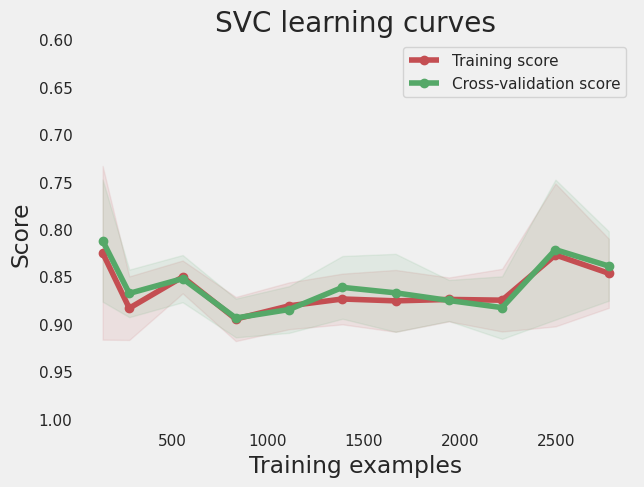

In [125]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

In [126]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Precision: 86.75 % 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



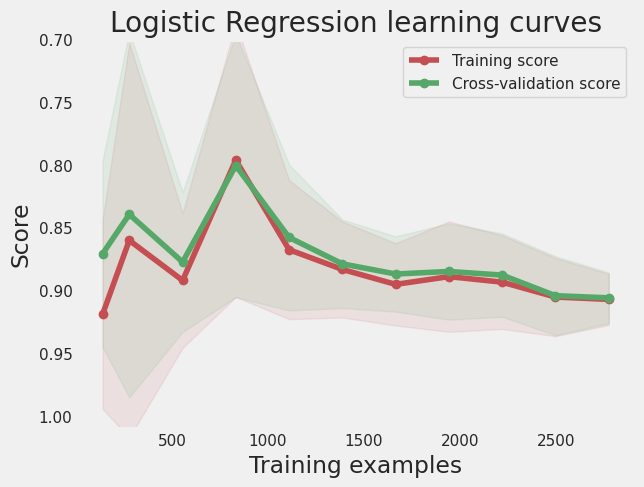

In [127]:
h = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [128]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Precision: 93.89 % 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



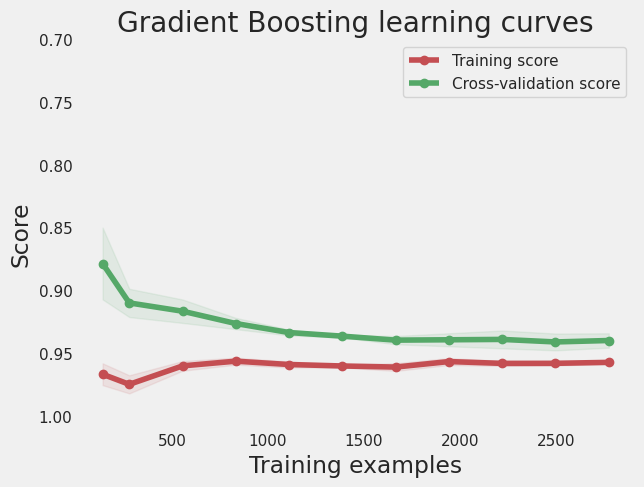

In [129]:
f = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [167]:
from sklearn import tree
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Precision: 89.75 % 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



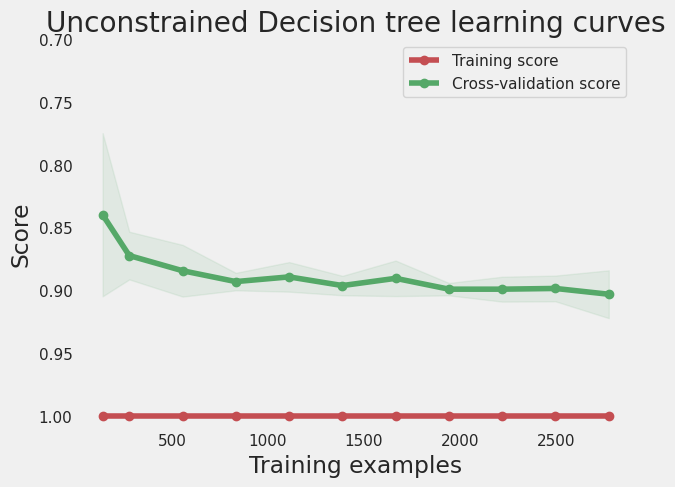

In [168]:
g = plot_learning_curve(tr.grid.best_estimator_, "Unconstrained Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
#The training score is always 100%, which impies overfitting, there may be too many nodes

In [130]:
#Constrain the maximum depth to be 4 and minimum samples of leaf to be 2
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=4,min_samples_leaf = 2)
tree1.fit(X_train, Y_train)
y_pred = tree1.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
# Train the decision tree classifier
print(f'Accuracy: {accuracy*100:.3f}%')

Accuracy: 93.894%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



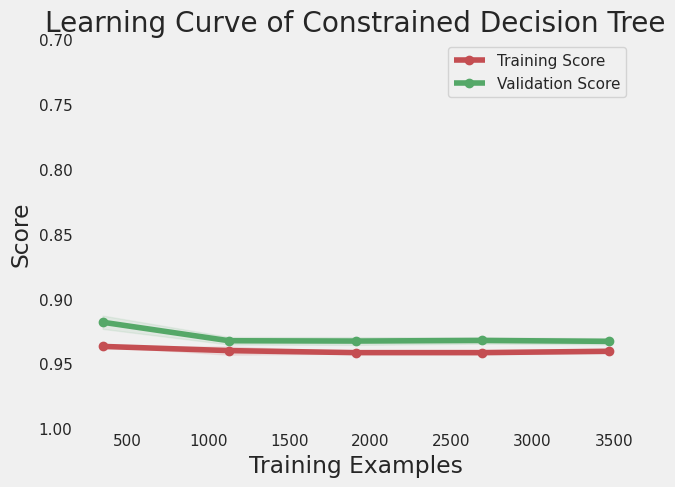

In [131]:
train_sizes, train_scores, val_scores = learning_curve(tree1, X, Y, cv=5)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve of Constrained Decision Tree")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Validation Score")
plt.ylim(1, 0.7)
plt.legend(loc="best")
plt.show()

In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


nn = Class_Fit(clf=MLPClassifier)
parameters = {'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)], 'activation': ['relu', 'tanh', 'logistic']}
nn.grid_search(parameters=parameters, Kfold=5)
nn.grid_fit(X=X_train, Y=Y_train)
nn.grid_predict(X_test, Y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Precision: 94.24 % 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



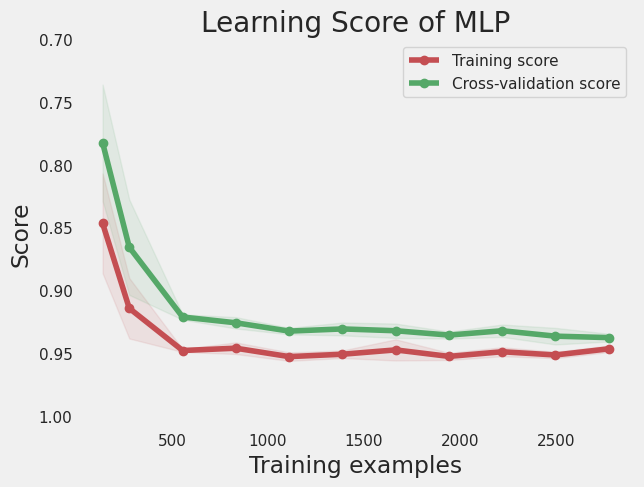

In [133]:
ne = plot_learning_curve(nn.grid.best_estimator_, "Learning Score of MLP", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


In [154]:
import xgboost as xgb
xgb1 = Class_Fit(clf=xgb.XGBClassifier)
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
xgb1.grid_search(parameters=parameters, Kfold=5)
xgb1.grid_fit(X=X_train, Y=Y_train)
xgb1.grid_predict(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/pytho

Precision: 94.12 % 


In [155]:
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best = tree.DecisionTreeClassifier(**tr.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)
mlp_best=MLPClassifier(**nn.grid.best_params_)
xgb_best=xgb.XGBClassifier(**xgb1.grid.best_params_)

In [156]:
votingC = ensemble.VotingClassifier(estimators=[('tr', tr_best),('gb', gb_best),('lr', lr_best),('mlp',mlp_best),('xgb',xgb_best)], voting='soft')

In [157]:
votingC = votingC.fit(X_train, Y_train)

In [158]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 94.35 % 


In [159]:
temp3=cleaned[pd.to_datetime(cleaned['InvoiceDate'])>pd.Timestamp(2011,10,1)].copy()
for i in temp3.columns[9:13]:
  a=temp3.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[i].sum()[i]
  set_test[i]=a
set_test.sample(3)

,CustomerID,InvoiceNo,TotalPrice,Category1,Category2,Category3,Category4
2441,14911,571377,292.00,77.70,114.50,54.50,45.30
449,12748,578814,255.92,63.12,68.11,32.73,91.96
5240,18109,581281,692.67,210.27,376.60,0.00,105.80


In [160]:
transactions_test=set_test.groupby(by=['CustomerID'])['TotalPrice'].agg(['count','min','max','mean','sum'])
for i in set_test.columns[3:7]:
    col = i
    transactions_test.loc[:,col] = set_test.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_test['sum']*100

transactions_test.reset_index(drop = False, inplace = True)

In [161]:
transactions_test

,CustomerID,count,min,max,mean,sum,Category1,Category2,Category3,Category4
0,12347,2,224.82,1294.32,759.570000,1519.14,9.827929,26.683518,6.917072,56.571481
1,12349,1,1757.55,1757.55,1757.550000,1757.55,25.678928,48.853802,9.050667,16.416603
2,12352,1,311.73,311.73,311.730000,311.73,13.505277,71.193020,5.581753,9.719950
3,12356,1,58.35,58.35,58.350000,58.35,0.000000,0.000000,0.000000,100.000000
4,12357,1,6207.67,6207.67,6207.670000,6207.67,29.286995,28.936622,14.452766,27.323617
...,...,...,...,...,...,...,...,...,...,...
2556,18276,1,335.86,335.86,335.860000,335.86,0.000000,45.102126,36.711725,18.186149
2557,18277,1,110.38,110.38,110.380000,110.38,0.000000,68.055807,17.938032,14.006161
2558,18282,1,77.84,77.84,77.840000,77.84,0.000000,39.439877,0.000000,60.560123
2559,18283,6,1.95,307.05,159.783333,958.70,17.610306,41.454052,10.900177,30.035465


In [162]:
list_test_cols = transactions_test.columns[1:10]
selected_customers_test = transactions_test.copy(deep = True)
matrix_test =pd.DataFrame(selected_customers_test[list_test_cols])
matrix_test

,count,min,max,mean,sum,Category1,Category2,Category3,Category4
0,2,224.82,1294.32,759.570000,1519.14,9.827929,26.683518,6.917072,56.571481
1,1,1757.55,1757.55,1757.550000,1757.55,25.678928,48.853802,9.050667,16.416603
2,1,311.73,311.73,311.730000,311.73,13.505277,71.193020,5.581753,9.719950
3,1,58.35,58.35,58.350000,58.35,0.000000,0.000000,0.000000,100.000000
4,1,6207.67,6207.67,6207.670000,6207.67,29.286995,28.936622,14.452766,27.323617
...,...,...,...,...,...,...,...,...,...
2556,1,335.86,335.86,335.860000,335.86,0.000000,45.102126,36.711725,18.186149
2557,1,110.38,110.38,110.380000,110.38,0.000000,68.055807,17.938032,14.006161
2558,1,77.84,77.84,77.840000,77.84,0.000000,39.439877,0.000000,60.560123
2559,6,1.95,307.05,159.783333,958.70,17.610306,41.454052,10.900177,30.035465


In [163]:
matrix_test=matrix_test.dropna(axis=0)
scaler2 = StandardScaler()
scaler2.fit(matrix_test)
print('variables mean values: \n' + 90*'-' + '\n' , scaler2.mean_)
scaled_matrix_test = scaler2.transform(matrix_test)


variables mean values: 
------------------------------------------------------------------------------------------
 [   2.09921875  373.15050391  607.43038281  468.65298585 1057.99956641
   25.83861883   28.09521867   12.91535628   33.15080622]


In [164]:

testY=kmeans.predict(scaled_matrix_test)

In [165]:
tcolumns = ['mean', 'Category1', 'Category2', 'Category3','Category4' ]
testX= transactions_test[tcolumns].dropna(axis=0)


In [170]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (tr, 'Decision Tree'),
                (gb, 'Gradient Boosting'),(nn,'Multilayer Perceptron'),(xgb1,'Extreme Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(testX, testY)

______________________________ 
Support Vector Machine
Precision: 88.20 % 
______________________________ 
Logostic Regression
Precision: 86.09 % 
______________________________ 
Decision Tree
Precision: 86.68 % 
______________________________ 
Gradient Boosting
Precision: 88.40 % 
______________________________ 
Multilayer Perceptron
Precision: 87.27 % 
______________________________ 
Extreme Gradient Boosting
Precision: 88.83 % 


In [169]:
predictions = votingC.predict(testX)
print(100*metrics.accuracy_score(testY, predictions),'%')

88.8671875 %
